In this Notebook we will have following tasks:
Here I have to mention that from now on I would provide all analysis and visualizations based on 70/30 sample file made on last notebook to prevent any probable memory error.

Importing libraries and dataframes.

Adding income category to the dataframe.

Providing bar and pie chart to observe the distribution.

Adding age-group column to our dataframe.

Observing market share of each age-group .

Checking customer order intervals among loyal and other customers.

Observing order habits among different customer groups.

Adding department-name column and observing its popularity among different customers groups.

Aggregate the max, mean, and min variables on a customer-profile level .

Compare your customer profiles with regions and departments.

Additional visualizations including:

Department popularity,Loyalty brand distribution,Family status distribution

Making orders-family status -age group chart

Observe difference of order behavior among regions.

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\poury\12-2023 Instacart Basket Analysis'

In [5]:
#importing sample data set to prevent memory errors
df_s = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'small_sample.pkl'))

In [4]:
df_s.head()

,product_id,product_name,department_id,prices,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,spending_flag,median_order_freq,order_freq_flag,gender,state,age,n_dependants,fam_status,income,region
0,1,Chocolate Sandwich Cookies,19,5.8,138,prior,28,6,11,3.0,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
2,907,Premium Sliced Bacon,12,20.0,138,prior,1,5,13,NaN,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
3,907,Premium Sliced Bacon,12,20.0,138,prior,10,5,14,6.0,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
6,4913,Table Water Crackers,19,4.4,138,prior,23,5,13,24.0,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
10,7987,Hazelnut Spread with Cocoa,13,12.8,138,prior,5,0,9,14.0,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest


# 5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
df_s['income'].describe()

count   9297011.00
mean      99655.40
std       43108.83
min       25903.00
25%       67281.00
50%       96760.00
75%      128081.00
max      593901.00
Name: income, dtype: float64

In [7]:
# Set the income thresholds for low and high income
low_income_threshold = 50000
high_income_threshold = 100000

In [8]:
# Create a new column 'income_category' based on the 'income' column
df_s['income_category'] = pd.cut(
    df_s['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True
)

In [9]:
df_s.head()

,product_id,product_name,department_id,prices,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,median_order_freq,order_freq_flag,gender,state,age,n_dependants,fam_status,income,region,income_category
0,1,Chocolate Sandwich Cookies,19,5.80,138,prior,28,6,11,3.00,...,8.00,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
2,907,Premium Sliced Bacon,12,20.00,138,prior,1,5,13,NaN,...,8.00,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
3,907,Premium Sliced Bacon,12,20.00,138,prior,10,5,14,6.00,...,8.00,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
6,4913,Table Water Crackers,19,4.40,138,prior,23,5,13,24.00,...,8.00,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,prior,5,0,9,14.00,...,8.00,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income


Text(0.5, 1.0, 'Income Category Distribution')

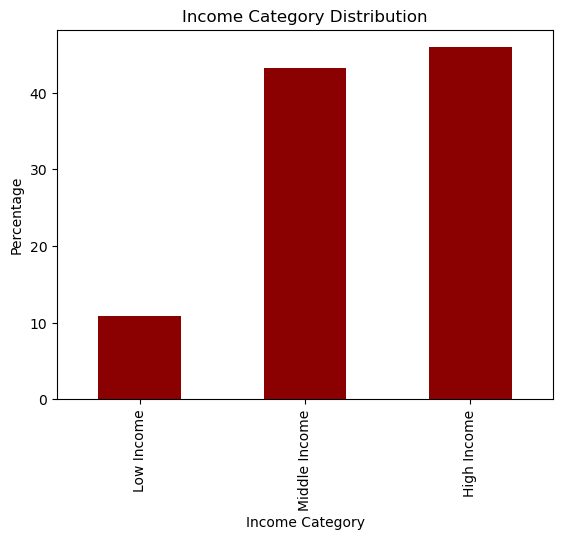

In [10]:
# Plot the percentage distribution of income categories
percentage_distribution = (df_s['income_category'].value_counts(normalize=True) * 100).sort_index()
percentage_distribution.plot.bar(color=['darkred'])
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Category Distribution')

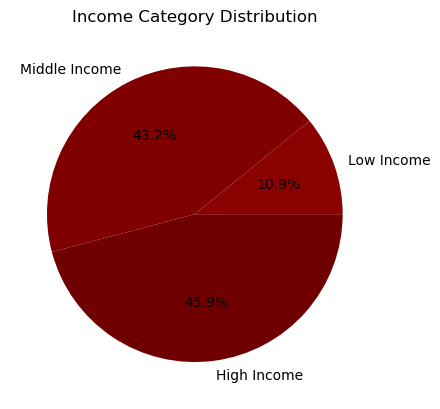

In [11]:
# Plot the pie chart
income_pie=plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors = ['#8B0000', '#800000', '#700000'])
plt.title('Income Category Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income.png'))


# Display the plot
plt.show()

In [12]:
df_s['age'].describe()

count   9297011.00
mean         49.47
std          18.48
min          18.00
25%          33.00
50%          49.00
75%          65.00
max          81.00
Name: age, dtype: float64

In [13]:
#making age-group column
def age_label(row):
    if row['age'] <= 24:
        return 'young-adult'
    elif 24 < row['age'] <= 44:
        return 'adult'
    elif 44 < row['age'] < 60:
        return 'middle-age'
    else:
        return 'senior'

In [14]:
df_s['age_group'] = df_s.apply(age_label, axis=1)

In [15]:
df_s['age_group'].value_counts()

age_group
senior         3175096
adult          2901364
middle-age     2194785
young-adult    1025766
Name: count, dtype: int64

In [16]:
# Calculate the percentage distribution of age groups
percentage_distribution_age = (df_s['age_group'].value_counts(normalize=True) * 100).sort_index()

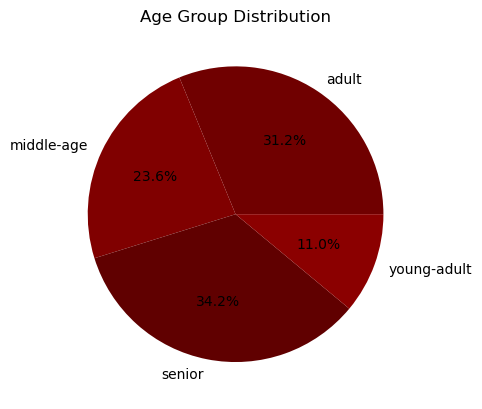

In [17]:
# Define four different shades of blue
colors = ['#700000', '#800000', '#600000', '#8B0000']

# Plot the pie chart with specified colors
pie_age_groups=plt.pie(percentage_distribution_age, labels=percentage_distribution_age.index, autopct='%1.1f%%', colors=colors)
plt.title('Age Group Distribution')
path = r'C:\Users\poury\12-2023 Instacart Basket Analysis'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))


(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

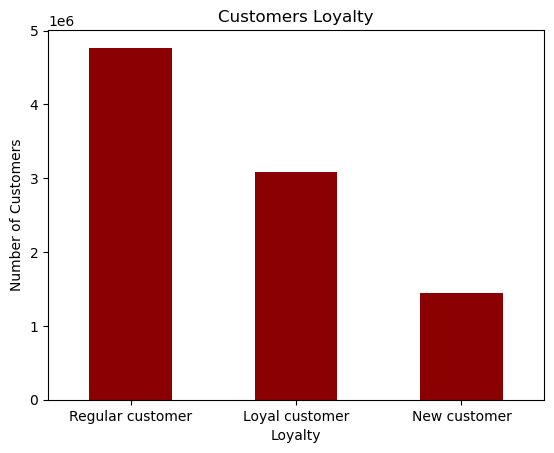

In [18]:
# Create a bar chart for showing the loyaltiy and number of orders
bar_orders_loyalty = df_s['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', color = 'darkred')
plt.xticks(rotation=0)

In [19]:
# Saving
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

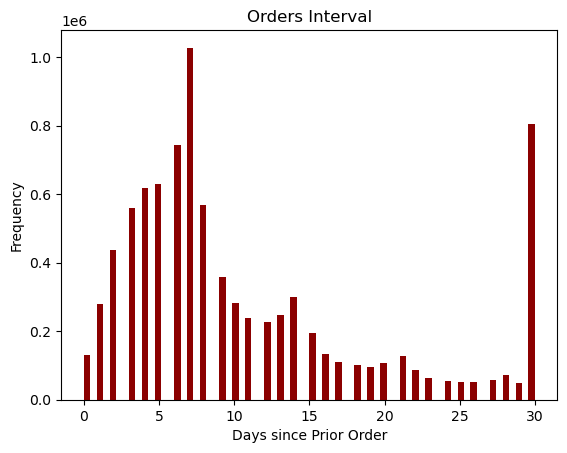

In [20]:
#order Interval  histogram
hist_order_interval = df_s['days_since_prior_order'].plot.hist(bins = 70, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = 'darkred')

In [21]:
# Saving
hist_order_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_interval.png'))

In [22]:
# Create a depend_flag to indicate whether the customers have dependants or not
df_s['avg_dependant'] = df_s.groupby(['user_id'])['n_dependants'].transform('mean')

In [23]:
df_s.loc[df_s['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

In [24]:
df_s.loc[df_s['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [25]:
df_s['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       6971828
Without Dependants    2325183
Name: count, dtype: int64

In [26]:
# Convert 'depend_flag' and 'income_category' to string
df_s['income_category'] = df_s['income_category'].astype(str)

In [27]:
# Creating the customer_profile column
df_s['customer_profile'] = df_s['age_group'] + '_' + df_s['income_category'] + '_' + df_s['depend_flag']

In [28]:
df_s.head()

,product_id,product_name,department_id,prices,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,age,n_dependants,fam_status,income,region,income_category,age_group,avg_dependant,depend_flag,customer_profile
0,1,Chocolate Sandwich Cookies,19,5.80,138,prior,28,6,11,3.00,...,81,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants
2,907,Premium Sliced Bacon,12,20.00,138,prior,1,5,13,NaN,...,81,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants
3,907,Premium Sliced Bacon,12,20.00,138,prior,10,5,14,6.00,...,81,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants
6,4913,Table Water Crackers,19,4.40,138,prior,23,5,13,24.00,...,81,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,prior,5,0,9,14.00,...,81,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants


In [29]:
#customer profile and sales 
customer_profile_sale = df_s.groupby('customer_profile')['prices'].sum()

In [30]:
customer_profile_sale_sorted = customer_profile_sale.sort_values(ascending=False)

In [31]:
colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(customer_profile_sale_sorted)))


In [32]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

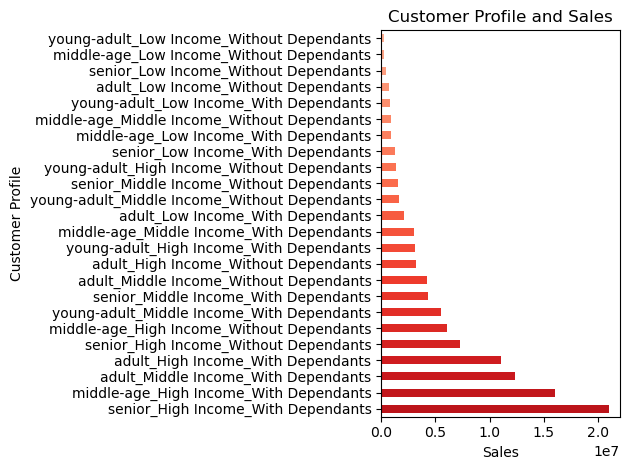

In [33]:
bar_customer_profile = customer_profile_sale_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = colors)
plt.tight_layout()

In [34]:
# Saving
bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

# Ordering habits

In [35]:
# Orders interval among customers profile
customer_profile_order = df_s.groupby('customer_profile')['days_since_prior_order'].mean()

In [36]:
customer_profile_sorted = customer_profile_order.sort_values(ascending=True)

In [37]:
colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(customer_profile_sorted)))

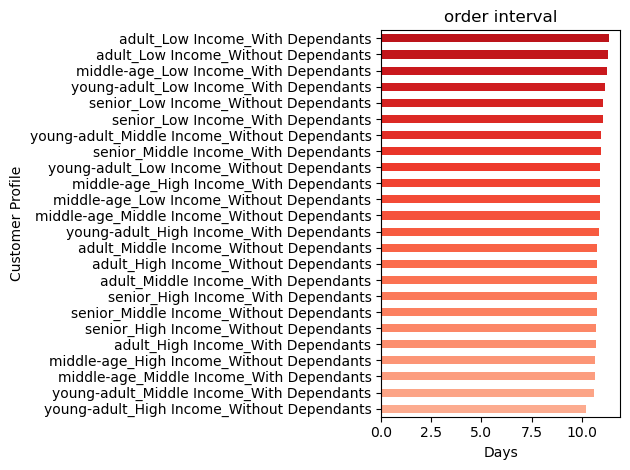

In [38]:
bar_customer_profile_orderintervals = customer_profile_sorted.plot.barh(title = 'order interval', xlabel = 'Days', ylabel = 'Customer Profile', color = colors)
plt.tight_layout()

In [39]:
# Saving
bar_customer_profile_orderintervals.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_orderintervals.png'))

# different order times  among customers profile

In [40]:
# Group by 'customer_profile' and 'order_hour_of_day' to get the counts
order_hour_day = df_s.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

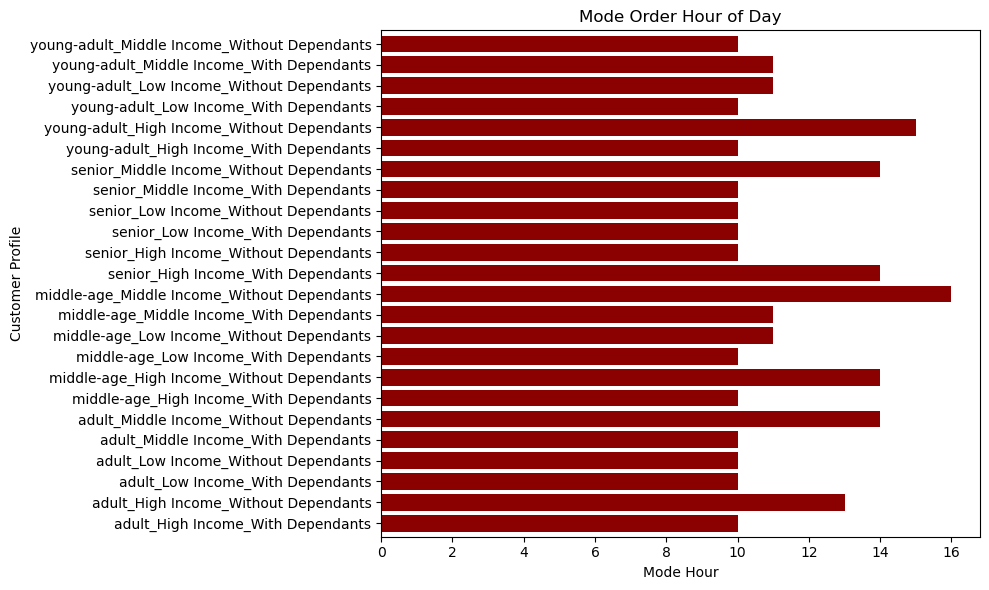

In [41]:
# Calculate the mode for each 'customer_profile'
order_hour_day_mode = df_s.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'customer_profile': order_hour_day_mode.index, 'mode_order_hour_of_day': order_hour_day_mode.values})

# Plotting the horizontal bar chart for mode
ax = plot_data.plot(kind='barh', x='customer_profile', y='mode_order_hour_of_day', color='Darkred', legend=False, title='Mode Order Hour of Day', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)

# Adjusting the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 6)  # Set the desired size

# Display the plot
plt.tight_layout()
plt.show()

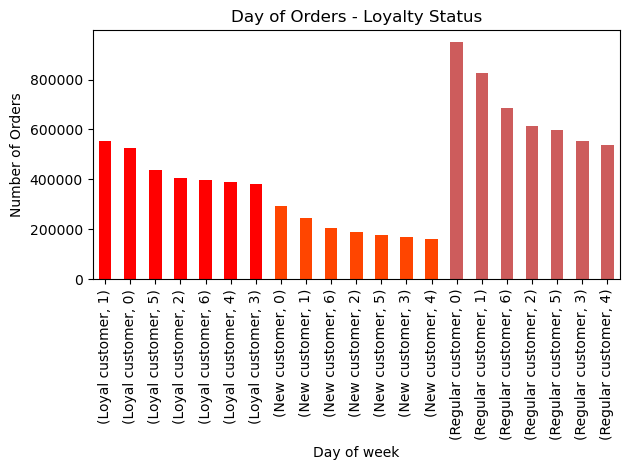

In [42]:
bar_day_loyalty = df_s.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color=['#FF0000'] * 7 + ['#FF4500'] * 7 + ['#CD5C5C'] * 7)
plt.tight_layout()

In [43]:
# Saving
bar_day_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_interval.png'))

# Departments and orders

In [44]:
# Mapping of department IDs to department names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

# Create the 'department_name' column
df_s['department_name'] = df_s['department_id'].map(department_mapping).fillna("missing")

In [45]:
df_s.head()

,product_id,product_name,department_id,prices,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,n_dependants,fam_status,income,region,income_category,age_group,avg_dependant,depend_flag,customer_profile,department_name
0,1,Chocolate Sandwich Cookies,19,5.80,138,prior,28,6,11,3.00,...,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants,snacks
2,907,Premium Sliced Bacon,12,20.00,138,prior,1,5,13,NaN,...,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants,meat seafood
3,907,Premium Sliced Bacon,12,20.00,138,prior,10,5,14,6.00,...,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants,meat seafood
6,4913,Table Water Crackers,19,4.40,138,prior,23,5,13,24.00,...,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants,snacks
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,prior,5,0,9,14.00,...,1,married,49620,Midwest,Low Income,senior,1.00,With Dependants,senior_Low Income_With Dependants,pantry


In [46]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_s_grouped = df_s.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [47]:
df_s_grouped = df_s_grouped.sort_values(by = 'Regular customer', ascending = False)

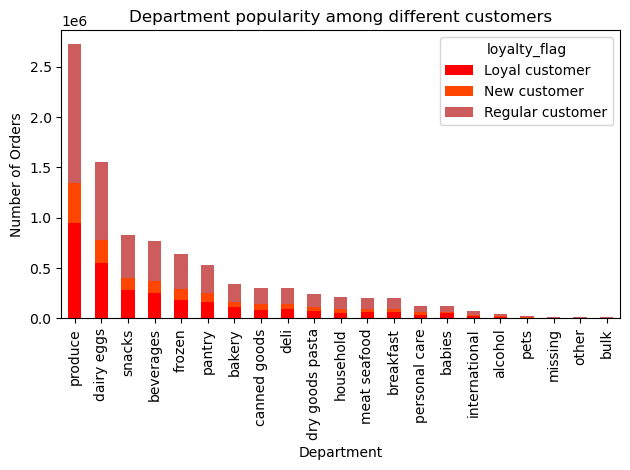

In [48]:
# Plot the data using a bar chart
colors = ['#FF0000', '#FF4500','#CD5C5C']
bar_dep_grouped = df_s_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [49]:
# Saving
bar_dep_grouped.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-Loyalty.png'))

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [50]:
# Group by customer_id and calculate max, mean, and min
profile_aggregated = df_s.groupby('user_id').agg({
    'age': ['max', 'mean', 'min'],
    'n_dependants': ['max', 'mean', 'min']
}).reset_index()

# Rename columns for clarity
profile_aggregated.columns = ['user_id', 
                              'max_age', 'mean_age', 'min_age',
                              'max_n_dependants', 'mean_n_dependants', 'min_n_dependants']

# Display the aggregated DataFrame
print(profile_aggregated)

        user_id  max_age  mean_age  min_age  max_n_dependants  \
0             1       31     31.00       31                 3   
1             2       68     68.00       68                 3   
2             3       33     33.00       33                 3   
3             4       31     31.00       31                 3   
4             7       39     39.00       39                 2   
...         ...      ...       ...      ...               ...   
162537   206203       81     81.00       81                 3   
162538   206206       25     25.00       25                 2   
162539   206207       76     76.00       76                 1   
162540   206208       64     64.00       64                 1   
162541   206209       74     74.00       74                 3   

        mean_n_dependants  min_n_dependants  
0                    3.00                 3  
1                    3.00                 3  
2                    3.00                 3  
3                    3.00          

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [51]:
# Create a dataframe to group the data by 'department_name' and 'region'
df_dep_region= df_s.groupby(['department_name', 'region']).size().unstack()

In [52]:
df_dep_region = df_dep_region.sort_values(by = 'South', ascending = False)

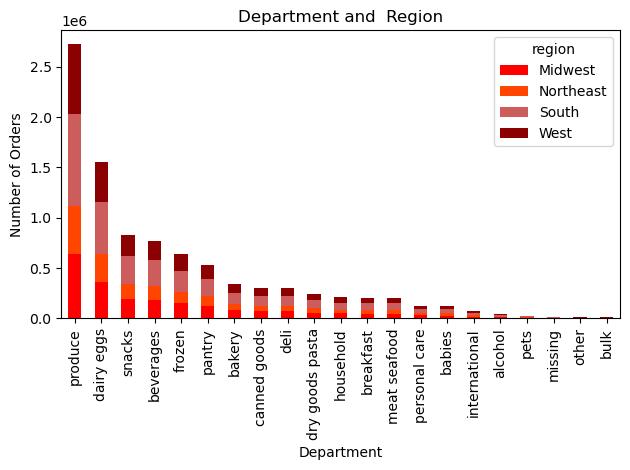

In [53]:
# Plot the data using a bar chart
colors = ['#FF0000', '#FF4500','#CD5C5C', 'darkred']
bar_dep_region =df_dep_region.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department and  Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [54]:
# Saving
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-stacked.png'))

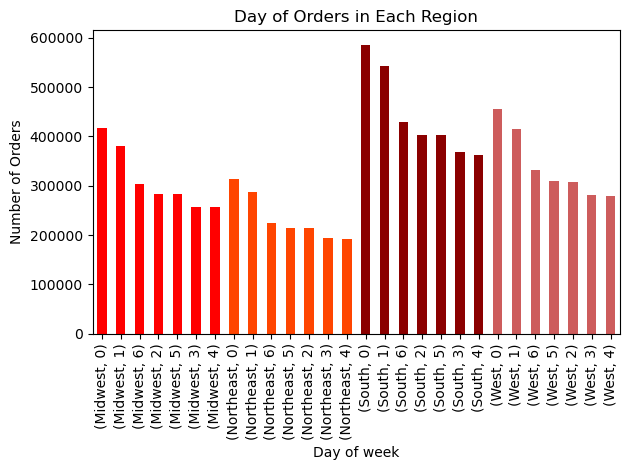

In [55]:
# difference of order behavior among regions
bar_day_region = df_s.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders in Each Region', xlabel = 'Day of week', ylabel = 'Number of Orders',color=['#FF0000'] * 7 + ['#FF4500'] * 7+['darkred'] * 7 + ['#CD5C5C'] * 7)
plt.tight_layout()

In [56]:
# Saving
bar_day_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-stacked.png'))

# Observing products populity among customers

In [57]:
# Products Poularity
#customer profile and sales 
product_pop = df_s.groupby('product_name')['order_number'].sum()

In [58]:
product_pop_sort= product_pop.sort_values(ascending=False)

In [59]:
colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(product_pop_sort)))


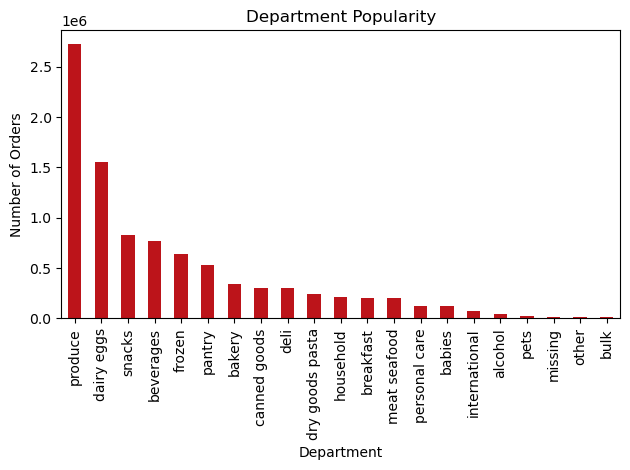

In [60]:
bar_depart_pop = df_s['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = colors)
plt.tight_layout()

In [61]:
# Saving
bar_depart_pop .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-popularity.png'))

# Additional visualizations

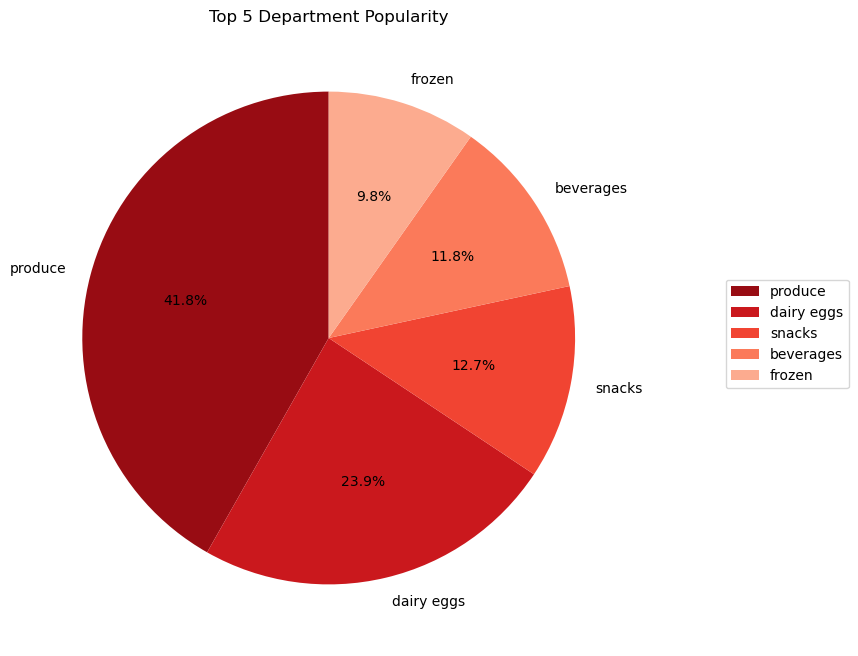

In [84]:
# Calculate the counts of each department
department_counts = df_s['department_name'].value_counts()

# Identify the top 10 departments
top_departments = department_counts.head(5).index

# Group other departments into "Other"
df_s['department_grouped'] = df_s['department_name'].where(df_s['department_name'].isin(top_departments))

# Calculate the percentage of each department group
department_percentage = df_s['department_grouped'].value_counts(normalize=True) * 100

# Define shades of red
shades_of_red = plt.cm.Reds(np.linspace(0.9, 0.3, len(department_percentage)))

# Create a pie chart with shades of red
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=shades_of_red)

# Add a legend with shades of red
ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)

# Set the title
plt.title('Top 5 Department Popularity', )
# Save the figure as an image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)
# Display the pie chart
plt.show()



# Loyalty brand distribution

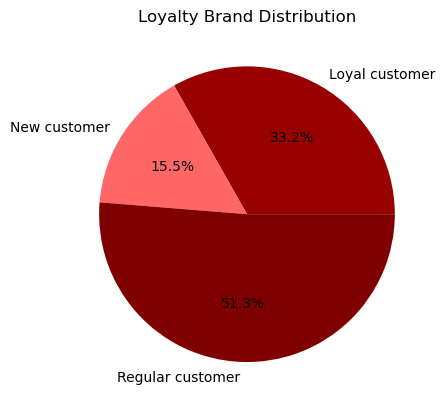

In [14]:
# Plot the pie chart
plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors = ['#990000', '#FF6666', '#800000'])
plt.title('Loyalty Brand Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png'))


# Display the plot
plt.show()

E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


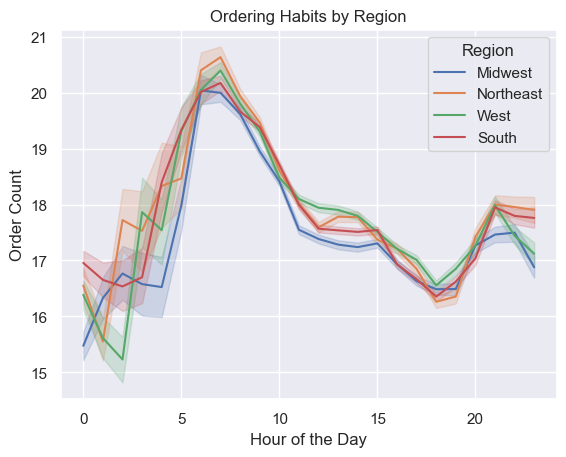

In [15]:
# Line chart using seaborn
sns.set_theme(style="darkgrid")  # Set the seaborn theme if needed
line_chart = sns.lineplot(data=df_s, x='order_hour_of_day', y='order_number', hue='region', )

# Set the title and labels
plt.title('Ordering Habits by Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')

# Display the legend
plt.legend(title='Region', loc='upper right')

# Show the plot
plt.show()

In [ ]:
#saving as png
line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region-orde.png'))

In [ ]:
# r

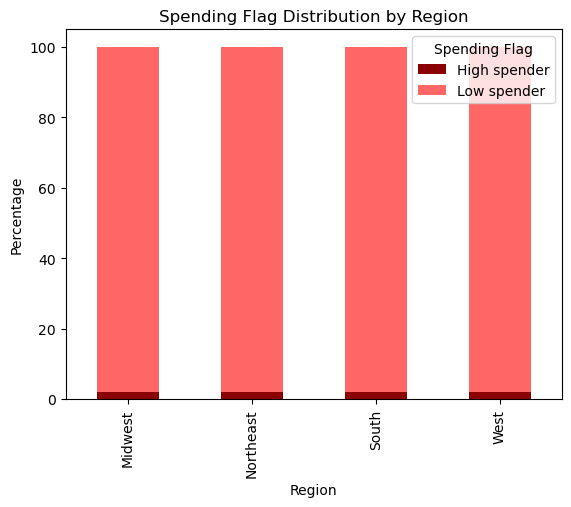

In [71]:
#making groups and normalizing the result
spending_by_region = df_s.groupby('region')['spending_flag'].value_counts(normalize=True).unstack() * 100
#defining colors
colors = ['#8B0000', '#FF6666']

# Plotting the bar chart
ax = spending_by_region.plot(kind='bar', stacked=True, color=colors)
fig = plt.gcf()
ax.set_facecolor('white')

# Adding labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending Flag Distribution by Region')

# Display the legend
ax.legend(title='Spending Flag', loc='upper right')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending region.png'), bbox_inches='tight', pad_inches=0.1)

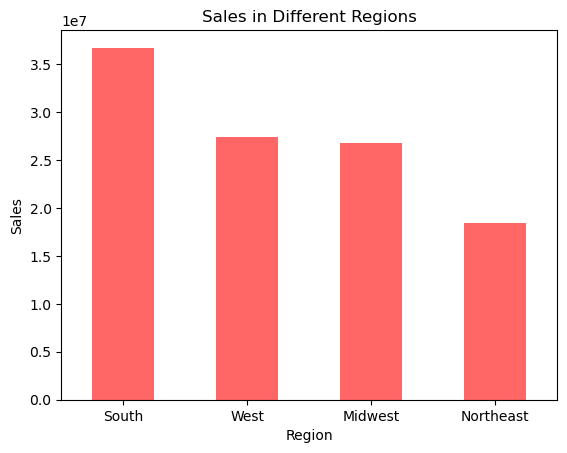

In [70]:
#purchased product prices in different regions
bar_price_region = df_s.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(
    title='Sales in Different Regions', xlabel='Region', ylabel='Sales', color='#FF6666'
)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_region_bar.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

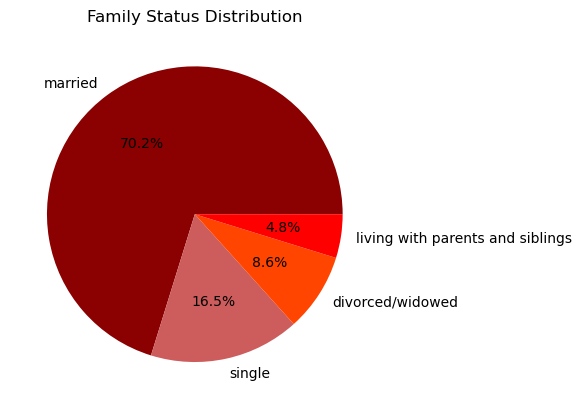

In [12]:
# Assuming df_s['fam_status'] is a categorical variable
family_status_counts = df_s['fam_status'].value_counts()

# Plotting pie chart with percentages
pie_fam_status=plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=['darkred', '#CD5C5C', '#FF4500', '#FF0000'])

# Adding title
plt.title('Family Status Distribution')
# Save the figure as an image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family.png')
plt.savefig(save_path)

# Making orders-family status -age group chart

In [95]:
# Create a dataframe to group the data by 'fam_status' and 'age_flag'
df_s_g = df_s.groupby(['fam_status', 'age_group']).size().unstack()

C:\Users\poury\AppData\Local\Temp\ipykernel_21248\3857926777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_s_g = df_s.groupby(['fam_status', 'age_group']).size().unstack()


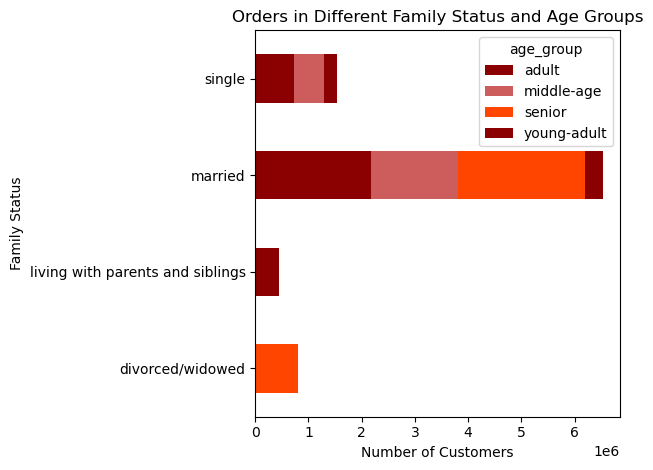

In [97]:
# Plot the data using a bar chart
colors = ['darkred', '#CD5C5C','#FF4500']
bar__age = df_s_g.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()